In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

### Western Electric Rules

Rule 1: Any single data point falls outside the 3σ-limit from the centerline (i.e., any point that falls outside Zone A, beyond either the upper or lower control limit)

Rule 2: Two out of three consecutive points fall beyond the 2σ-limit (in zone A or beyond), on the same side of the centerline

Rule 3: Four out of five consecutive points fall beyond the 1σ-limit (in zone B or beyond), on the same side of the centerline.

Rule 4	NINE consecutive points fall on the same side of the centerline (in zone C or beyond)

In [40]:
def rando():
    theNum = np.random.randint(50,100)
    return theNum

In [41]:
def testRule1(arr,newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    sigUp = themean + sd*3
    sigDown = themean - sd*3
    if newNum > sigUp:
        print(f"Rule 1 Violation. Upper Control Limit (UCL -- mean + 3SD) is {round(sigUp,1)}")
        proceed(newNum)
    elif newNum < sigDown:
        print(f"Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is {round(sigDown,1)}.")
        proceed(newNum)
    else:
        myArr.append(newNum)
        print("New datum added to list")
        print(f"New array: {myArr}")
    keepOn = input("Continue with monitoring (y/n)? \n")
        
    

In [42]:
def testRule1b(obj,newNum, mean, sd):
    sigUp = mean + sd*3
    sigDown = mean - sd*3
    code = (newNum > sigUp) or (newNum < sigDown)
    obj['format_1'] = np.append(obj['format_1'],code)
    return

In [43]:
def testRule2b(obj, newNum, mean, sd):
    twoSigUp = mean + sd*2
    twoSigDown = mean - sd*2
    temp_clipped = obj['all_vals'][-2:]
    temp_clipped = np.append(temp_clipped,newNum)
    above2 = temp_clipped > twoSigUp
    below2 = temp_clipped < twoSigDown
    code = (above2.sum(axis=0) >= 2) or (below2.sum(axis=0) >= 2)
    obj['format_2'] = np.append(obj['format_2'],code)
    return    

In [44]:
def testRule3b(obj, newNum, mean, sd):
    oneSigUp = mean + sd
    oneSigDown = mean - sd
    temp_clipped = obj['all_vals'][-5:]
    temp_clipped = np.append(temp_clipped,newNum)
    above1 = temp_clipped > oneSigUp
    below1 = temp_clipped < oneSigDown
    code = (above1.sum(axis=0) >= 4) or (below1.sum(axis=0) >= 4)
    obj['format_3'] = np.append(obj['format_3'],code)
    return

In [45]:
def testRule4b(obj, newNum, mean):
    temp_clipped = obj['all_vals'][-8:]
    temp_clipped = np.append(temp_clipped,newNum)
    above = temp_clipped > mean
    below = temp_clipped < mean
    code = (above.sum(axis=0) >= 9) or (below.sum(axis=0) >= 9)
    obj['format_4'] = np.append(obj['format_4'],code)
    return

In [46]:
def violations(obj,datum):
    
    theMean = np.mean(obj['all_vals'])
    sd = np.std(obj['all_vals'])
    testRule1b(obj,datum, theMean, sd)
    testRule2b(obj,datum, theMean, sd)
    testRule3b(obj,datum, theMean, sd)
    testRule4b(obj,datum, theMean)
    return

In [47]:
def assign_datum(obj,datum = None):
    if(datum is None):
        datum = rando()
    violations(obj,datum)
    obj['all_vals'] = np.append(obj['all_vals'],datum)
    print(obj['all_vals'])
    print(obj['format_4'])
    print(obj['format_3'])
    print(obj['format_2'])
    print(obj['format_1'])
    return
    

In [66]:
trendObj = {'all_vals': np.random.randint(50, 100, size=100),
            'format_1': np.zeros(100),
            'format_2': np.zeros(100),
            'format_3': np.zeros(100),
            'format_4': np.zeros(100),
           }


In [67]:
#Return the value's index if rule has been violated.  This will be used for formatting.
def format_arr(rule):
    rule_arr = 'format_' + str(rule)
    return [index for index,val in enumerate(trendObj[rule_arr]) if val]


In [98]:
assign_datum(trendObj,95)

[ 62  76  81  97  72  95  88  50  68  80  81  83  78  63  54  94  86  95
  97  56  97  92  80  89  56  63  80  70  59  60  63  50  92  60  67  58
  85  81  99  94  98  69  54  73  87  59  54  80  56  50  70  85  83  56
  91  57  70  62  80  54  82  65  91  65  99  99  62  65  93  59  98  64
  89  76  80  69  78  74  61  85  50  74  63  97  50  99  64  89  60  78
  63  84  52  90  54  74  89  82  59  53  77  77  77  77  77  77  77  77
  77 130 110 100  95]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

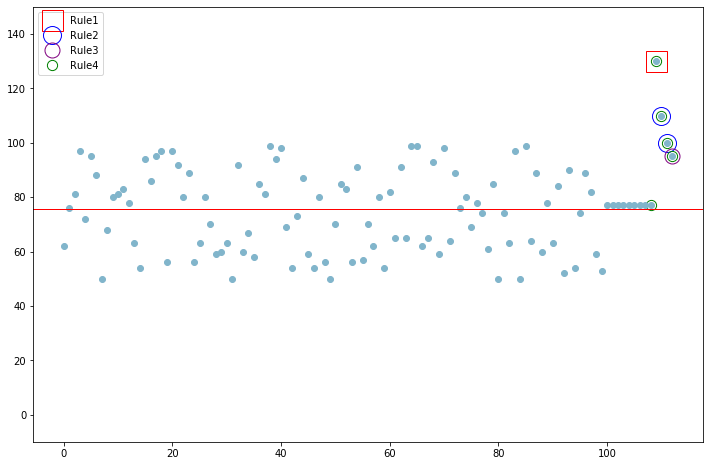

In [133]:
#Plot all values and the formatting arrays to show violations
#81B5CB
#plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(1), ls="", marker=8, label="Rule1", markersize=10.0)
mark = 6.0
plt.figure(figsize=(12,8))
plt.plot(trendObj['all_vals'], color='red',markevery=format_arr(1), ls="", marker='s',mfc = 'none', mec='red', label="Rule1", markersize=mark*3.5)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(2), ls="", marker='o', mfc='none',mec='blue',label="Rule2", markersize=mark*3)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(3), ls="", marker='o', mfc='none',mec='purple',label="Rule3", markersize=mark*2.5)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(4), ls="", marker='o', mfc='none',mec='green',label="Rule4", markersize=mark*1.7)
plt.plot(trendObj['all_vals'], color='#81B5CB', ls="", marker="o", markersize=mark)
#plt.plot(trendObj['all_vals'], color='yellow',markevery=format_arr(4), ls="", marker='x', mfc='none',mec='green',label="Rule4", markersize=mark)
plt.axhline(y=np.mean(trendObj['all_vals']), linewidth=1, color='r')
plt.legend()
plt.ylim(-10, 150)
plt.show()

In [52]:
def proceed(num):
    while True:
        result = input("Add to data set? (y/n) \n")
        if result.lower() not in ('y','n'):
            print('Sorry, not a valid response')
            continue
        else:
            break
    if result == 'y':
        myArr.append(num)
        print("New datum added to list")
     
    

In [53]:
keepGoing = True
while keepGoing:
    question = input("Should I keep going? \n")
    if question == 'n':
        print("Ok, thanks for playing!")
        keepGoing = False

Should I keep going? 
n
Ok, thanks for playing!
